In [1]:
import numpy as np
import pandas as pd

# For reproducibility
np.random.seed(0)

# Create two right-skewed features using exponential distribution
feature_a = np.random.exponential(scale=2.0, size=100)
feature_b = np.random.exponential(scale=3.0, size=100)

# Add extreme outliers
feature_a = np.append(feature_a, [15, 20, 25])
feature_b = np.append(feature_b, [30, 40, 50])

# Create DataFrame
df = pd.DataFrame({
    'Feature_A': feature_a,  # Will use Log Transform
    'Feature_B': feature_b   # Will use IQR Method
})

print(df.head())


   Feature_A  Feature_B
0   1.591749   3.397902
1   2.511862   0.944165
2   1.846446   3.986274
3   1.574402   9.825430
4   1.102097   0.858063


C:\Users\amitm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amitm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


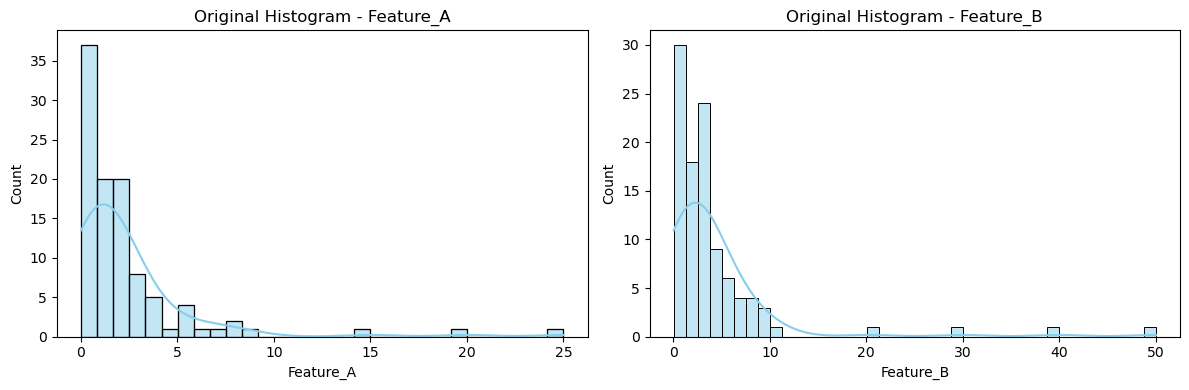

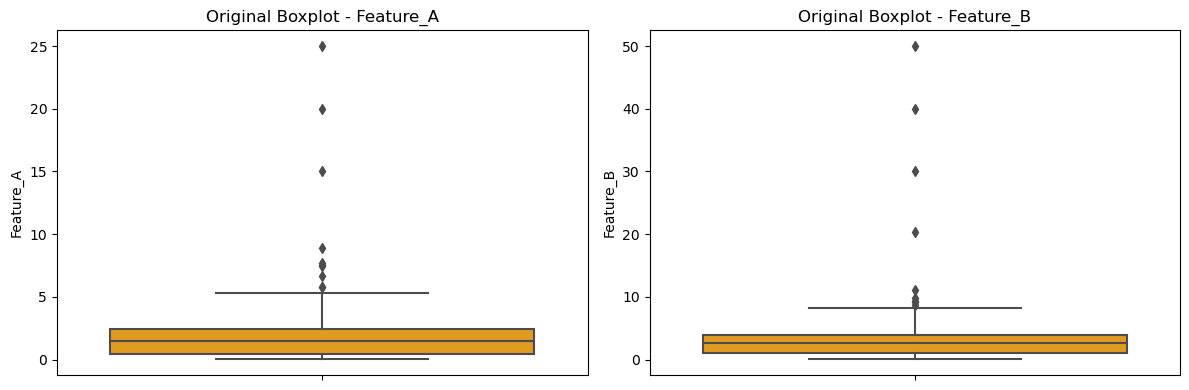

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(12, 4))
for i, col in enumerate(df.columns):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Original Histogram - {col}")
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 4))
for i, col in enumerate(df.columns):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f"Original Boxplot - {col}")
plt.tight_layout()
plt.show()


In [3]:
# Apply log1p (log(x+1)) to handle zero safely
df['Feature_A_Log'] = np.log1p(df['Feature_A'])

C:\Users\amitm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


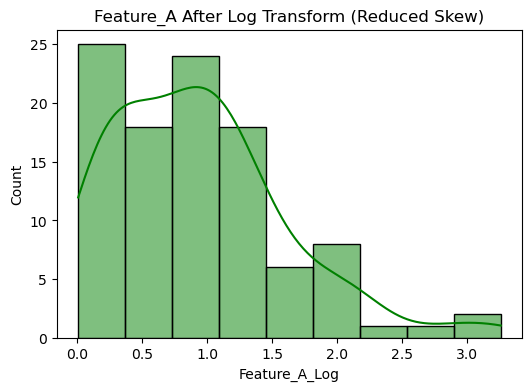

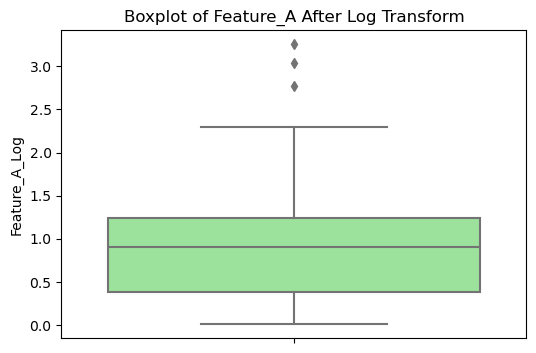

In [4]:
# Visualize after log transformation
plt.figure(figsize=(6, 4))
sns.histplot(df['Feature_A_Log'], kde=True, color='green')
plt.title("Feature_A After Log Transform (Reduced Skew)")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Feature_A_Log'], color='lightgreen')
plt.title("Boxplot of Feature_A After Log Transform")
plt.show()

In [5]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply IQR
df_iqr = remove_outliers_iqr(df, 'Feature_B')

C:\Users\amitm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


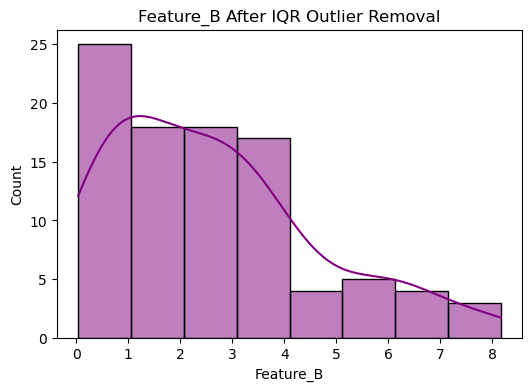

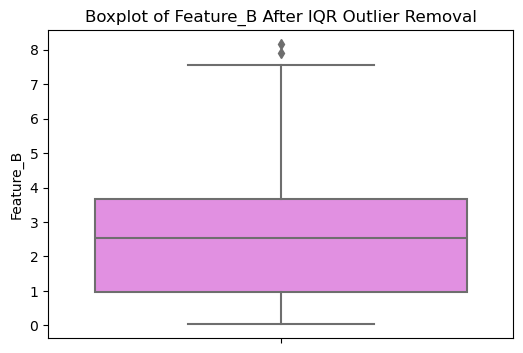

In [6]:
# Visualize after IQR removal
plt.figure(figsize=(6, 4))
sns.histplot(df_iqr['Feature_B'], kde=True, color='purple')
plt.title("Feature_B After IQR Outlier Removal")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(y=df_iqr['Feature_B'], color='violet')
plt.title("Boxplot of Feature_B After IQR Outlier Removal")
plt.show()

In [7]:
import numpy as np
import pandas as pd

# For reproducibility
np.random.seed(42)

# Generate right-skewed data and flip to get left-skewed
feature_x = -np.random.exponential(scale=2.0, size=100) + 10
feature_y = -np.random.exponential(scale=3.0, size=100) + 12

# Add extreme low outliers
feature_x = np.append(feature_x, [0, -1, -3])
feature_y = np.append(feature_y, [1, -2, -4])

# Create DataFrame
df = pd.DataFrame({
    'Feature_X': feature_x,  # Will use power transform
    'Feature_Y': feature_y   # Will use IQR method
})

print(df.describe())


        Feature_X   Feature_Y
count  103.000000  103.000000
mean     7.893693    8.758568
std      2.430931    3.258745
min     -3.000000   -4.000000
25%      7.095717    7.087024
50%      8.638371    9.855372
75%      9.560326   11.154175
max      9.988925   11.979071


C:\Users\amitm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amitm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


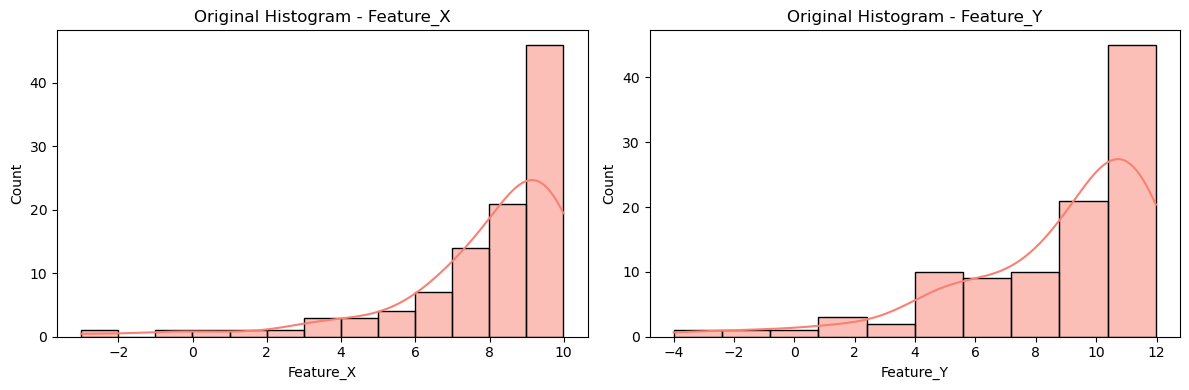

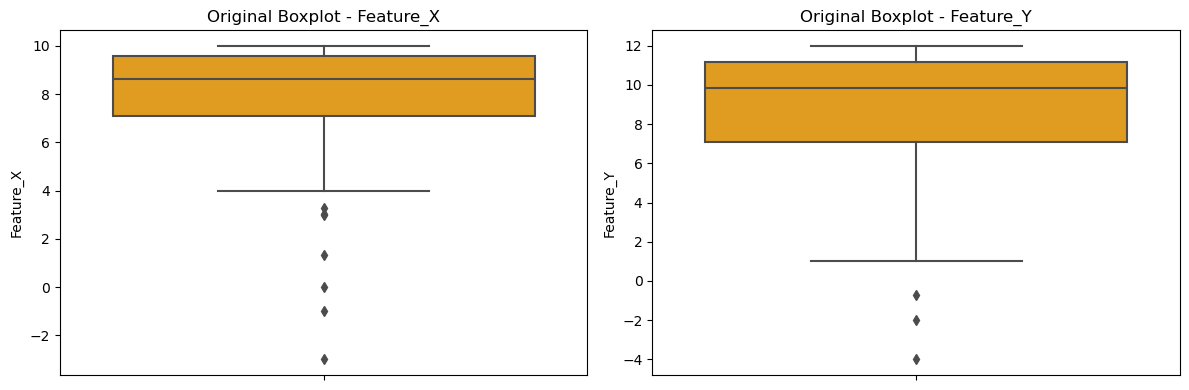

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(12, 4))
for i, col in enumerate(df.columns):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], kde=True, color='salmon')
    plt.title(f"Original Histogram - {col}")
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 4))
for i, col in enumerate(df.columns):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f"Original Boxplot - {col}")
plt.tight_layout()
plt.show()


In [9]:
# Shift to make all values positive
shifted_x = df['Feature_X'] - df['Feature_X'].min() + 1

# Apply square root (or square) to reduce left skew
df['Feature_X_Power'] = np.sqrt(shifted_x)

C:\Users\amitm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


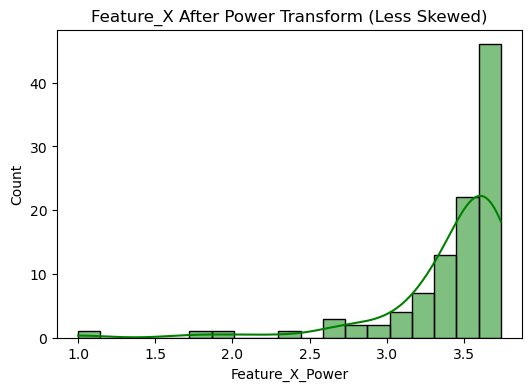

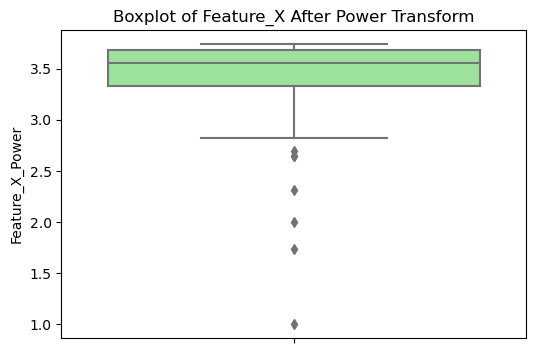

In [10]:
# Visualize after transformation
plt.figure(figsize=(6, 4))
sns.histplot(df['Feature_X_Power'], kde=True, color='green')
plt.title("Feature_X After Power Transform (Less Skewed)")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Feature_X_Power'], color='lightgreen')
plt.title("Boxplot of Feature_X After Power Transform")
plt.show()

C:\Users\amitm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


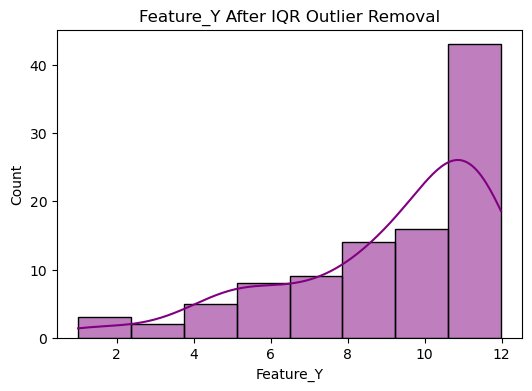

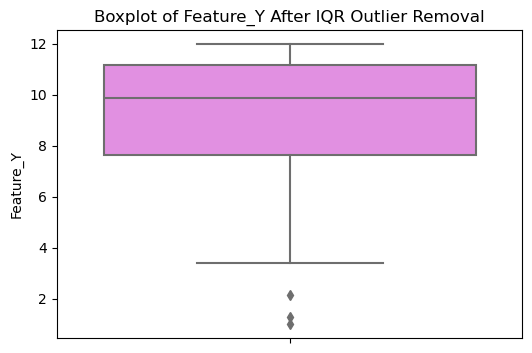

In [11]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Apply IQR
df_iqr = remove_outliers_iqr(df, 'Feature_Y')

# Visualize after outlier removal
plt.figure(figsize=(6, 4))
sns.histplot(df_iqr['Feature_Y'], kde=True, color='purple')
plt.title("Feature_Y After IQR Outlier Removal")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(y=df_iqr['Feature_Y'], color='violet')
plt.title("Boxplot of Feature_Y After IQR Outlier Removal")
plt.show()